<a href="https://colab.research.google.com/github/augurnaut/DS-Unit-1-Build/blob/master/Build_Week_1_final_draft_How_Selfish_Can_You_Be%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Gotta lay all of my ducks in a row. Prepare for battle. Battle Ducks. Better
#than any mercenary on the market I'm sure.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import t, ttest_1samp, ttest_ind

In [0]:
#A feast for the eyes at the expense of brain power and the illusion of comprehension

pd.set_option('display.max_rows',200)
pd.set_option('display.max_columns',100)

In [0]:
#Secure the goods

from google.colab import files
uploaded = files.upload()

Saving to Tally via Drive Raw file 2019-worlds-match-data-OraclesElixir-2019-10-20 - Copy.csv to to Tally via Drive Raw file 2019-worlds-match-data-OraclesElixir-2019-10-20 - Copy (2).csv


In [0]:
#ahhhh yes, a flooded plain

raw = pd.read_csv('to Tally via Drive Raw file 2019-worlds-match-data-OraclesElixir-2019-10-20 - Copy.csv')
raw

gameid                                                url league  \
0     1070340  https://matchhistory.euw.leagueoflegends.com/e...     WC   
1     1070340  https://matchhistory.euw.leagueoflegends.com/e...     WC   
2     1070340  https://matchhistory.euw.leagueoflegends.com/e...     WC   
3     1070340  https://matchhistory.euw.leagueoflegends.com/e...     WC   
4     1070340  https://matchhistory.euw.leagueoflegends.com/e...     WC   
...       ...                                                ...    ...   
1099  1071731  http://matchhistory.na.leagueoflegends.com/en/...     WC   
1100  1071731  http://matchhistory.na.leagueoflegends.com/en/...     WC   
1101  1071731  http://matchhistory.na.leagueoflegends.com/en/...     WC   
1102  1071731  http://matchhistory.na.leagueoflegends.com/en/...     WC   
1103  1071731  http://matchhistory.na.leagueoflegends.com/en/...     WC   

       split         date   week game  patchno  playerid  side position  \
0     2019-W  43740.28615  PI-RR    1     9.19         1  Blue      Top   
1     2019-W  43740.28615  PI-RR    1     9.19         2  Blue   Jungle   
2     2019-W  43740.28615  PI-RR    1     9.19         3  Blue   Middle   
3     2019-W  43740.28615  PI-RR    1     9.19         4  Blue      ADC   
4     2019-W  43740.28615  PI-RR    1     9.19         5  Blue  Support   
...      ...          ...    ...  ...      ...       ...   ...      ...   
1099  2019-W  43758.47475      G  8.6     9.19         8   Red   Middle   
1100  2019-W  43758.47475      G  8.6     9.19         9   Red      ADC   
1101  2019-W  43758.47475      G  8.6     9.19        10   Red  Support   
1102  2019-W  43758.47475      G  8.6     9.19       100  Blue     Team   
1103  2019-W  43758.47475      G  8.6     9.19       200   Red     Team   

          player                team  champion       ban1       ban2     ban3  \
0            Evi  DetonatioN FocusMe      Gnar     Qiyana  Gangplank    Akali   
1          Steal  DetonatioN FocusMe      Ekko     Qiyana  Gangplank    Akali   
2          Ceros  DetonatioN FocusMe  Nocturne     Qiyana  Gangplank    Akali   
3        Yutapon  DetonatioN FocusMe    Lucian     Qiyana  Gangplank    Akali   
4          Gaeng  DetonatioN FocusMe    Thresh     Qiyana  Gangplank    Akali   
...          ...                 ...       ...        ...        ...      ...   
1099      Jensen         Team Liquid   LeBlanc   Pantheon      Jayce    Akali   
1100  Doublelift         Team Liquid     Xayah   Pantheon      Jayce    Akali   
1101      CoreJJ         Team Liquid  Nautilus   Pantheon      Jayce    Akali   
1102        Team     Invictus Gaming            Jarvan IV      Rakan  Skarner   
1103        Team         Team Liquid             Pantheon      Jayce    Akali   

         ban4       ban5  gamelength  result   k   d   a  teamkills  \
0       Elise       Olaf   26.533333       0   0   4   4          7   
1       Elise       Olaf   26.533333       0   1   4   5          7   
2       Elise       Olaf   26.533333       0   1   5   6          7   
3       Elise       Olaf   26.533333       0   3   4   1          7   
4       Elise       Olaf   26.533333       0   2   5   2          7   
...       ...        ...         ...     ...  ..  ..  ..        ...   
1099   Syndra  Lissandra   24.116667       0   2   5   1          4   
1100   Syndra  Lissandra   24.116667       0   0   3   1          4   
1101   Syndra  Lissandra   24.116667       0   1   3   0          4   
1102  Lee Sin      Kayle   24.116667       1  18   4  33         18   
1103   Syndra  Lissandra   24.116667       0   4  18   3          4   

      teamdeaths doubles triples quadras pentas  fb  fbassist  fbvictim  \
0             22       0       0       0      0   0         0         0   
1             22       0       0       0      0   0         0         0   
2             22       0       0       0      0   0         0         0   
3             22       1       0       0      0   0         0         0   
4   

In [0]:
#Life is like a box of chocolates but my columns need not be

raw.dtypes

gameid                       int64
url                         object
league                      object
split                       object
date                       float64
week                        object
game                        object
patchno                    float64
playerid                     int64
side                        object
position                    object
player                      object
team                        object
champion                    object
ban1                        object
ban2                        object
ban3                        object
ban4                        object
ban5                        object
gamelength                 float64
result                       int64
k                            int64
d                            int64
a                            int64
teamkills                    int64
teamdeaths                   int64
doubles                     object
triples                     object
quadras             

In [0]:
#One bad apple can ruin the whole barrel. best to get a bunch of barrels then
#apples are pretty great

raw.isnull().sum()

gameid                       0
url                          0
league                       0
split                        0
date                         0
week                         0
game                         0
patchno                      0
playerid                     0
side                         0
position                     0
player                       0
team                         0
champion                     0
ban1                         0
ban2                         0
ban3                         0
ban4                         0
ban5                         6
gamelength                   0
result                       0
k                            0
d                            0
a                            0
teamkills                    0
teamdeaths                   0
doubles                      0
triples                      0
quadras                      0
pentas                       0
fb                           0
fbassist                     0
fbvictim

In [0]:
overallstats = raw[['game','playerid','side','position','champion','gamelength',
                  'result','k','d','a','teamkills','teamdeaths','doubles',
                  'triples','quadras','fb','fbvictim','fbtime','kpm','okpm',
                  'ckpm','teamdragkills','oppdragkills','ft','fttime',
                  'firstmidouter','firsttothreetowers','teamtowerkills',
                  'opptowerkills','fbaron','dmgtochamps','dmgtochampsperminute',
                  'dmgshare','wards','wpm','wardkills','wcpm','visionwards',
                  'visionwardbuys','totalgold','earnedgpm','goldspent',
                  'minionkills','monsterkills','monsterkillsownjungle',
                  'monsterkillsenemyjungle']]

overallstats.head()

game  playerid  side position  champion  gamelength  result  k  d  a  \
0    1         1  Blue      Top      Gnar   26.533333       0  0  4  4   
1    1         2  Blue   Jungle      Ekko   26.533333       0  1  4  5   
2    1         3  Blue   Middle  Nocturne   26.533333       0  1  5  6   
3    1         4  Blue      ADC    Lucian   26.533333       0  3  4  1   
4    1         5  Blue  Support    Thresh   26.533333       0  2  5  2   

   teamkills  teamdeaths doubles triples quadras  fb  fbvictim    fbtime  \
0          7          22       0       0       0   0         0  3.879983   
1          7          22       0       0       0   0         0  3.879983   
2          7          22       0       0       0   0         0  3.879983   
3          7          22       1       0       0   0         0  3.879983   
4          7          22       0       0       0   0         1  3.879983   

        kpm      okpm      ckpm  teamdragkills  oppdragkills  ft     fttime  \
0  0.000000  0.037688  1.092965              1             2   0  13.588567   
1  0.037688  0.263819  1.092965              1             2   0  13.588567   
2  0.037688  0.113065  1.092965              1             2   0  13.588567   
3  0.113065  0.414573  1.092965              1             2   0  13.588567   
4  0.075377  0.000000  1.092965              1             2   0  13.588567   

   firstmidouter  firsttothreetowers  teamtowerkills  opptowerkills  fbaron  \
0              0                   0               1             10     0.0   
1              0                   0               1             10     0.0   
2              0                   0               1             10     0.0   
3              0                   0               1             10     0.0   
4              0                   0               1             10     0.0   

   dmgtochamps  dmgtochampsperminute     dmgshare  wards       wpm  wardkills  \
0        11588            436.733668  0.312067433     11  0.414573          4   
1         7925            298.680904  0.213422024     24  0.904523          8   
2         7557            284.811558  0.203511701     13  0.489950          1   
3         7369            277.726131  0.198448819      9  0.339196          7   
4         2694            101.532663  0.072550023     47  1.771357          8   

       wcpm  visionwards  visionwardbuys  totalgold   earnedgpm  goldspent  \
0  0.150754            4               6       8407  184.059799       8300   
1  0.301508           11              13       7463  148.481910       7360   
2  0.037688            6               7       8484  186.961809       7700   
3  0.263819            3               4      10624  267.615075      10150   
4  0.301508           13              14       6249  102.728141       5450   

   minionkills  monsterkills  monsterkillsownjungle  monsterkillsenemyjungle  
0          180             8                      4                        1  
1           35            96                     76                        0  
2          186             6                      4                        0  
3          219            20                     20                        0  
4           12             2                      2                        0

In [0]:
overallstats.shape

(1104, 46)

In [0]:
#This was a long journey that I did not wish to repeat; the resulting
#monstrosity has been preserved as a jpeg on my hard-drive, never to take another
#breath of fresh air again. some things are best left alone

#sns.pairplot(overallstats, hue = 'result') 

In [0]:
#After squinting at the zoomed in picture for the amount of time it takes 
#fermented bread to rise, I had realized I seriously needed to narrow down my 
#options. After tinkering around a bit, in line with my mood of self preservation,
#preserving my sanity, health and eyesight, I thought: why not evaluate on how 
#selfish something can be?

"What ratio of kills to assists is the winning golden ticket? Stay humble and bet low."


'What ratio of kills to assists is the winning golden ticket? Stay humble and bet low.'

In [0]:
rawteam = raw[raw.position.str.contains('Team')]
rawteam

gameid                                                url league  \
10    1070340  https://matchhistory.euw.leagueoflegends.com/e...     WC   
11    1070340  https://matchhistory.euw.leagueoflegends.com/e...     WC   
22    1070330  https://matchhistory.euw.leagueoflegends.com/e...     WC   
23    1070330  https://matchhistory.euw.leagueoflegends.com/e...     WC   
34    1070349  https://matchhistory.euw.leagueoflegends.com/e...     WC   
35    1070349  https://matchhistory.euw.leagueoflegends.com/e...     WC   
46    1070359  https://matchhistory.euw.leagueoflegends.com/e...     WC   
47    1070359  https://matchhistory.euw.leagueoflegends.com/e...     WC   
58    1070365  https://matchhistory.euw.leagueoflegends.com/e...     WC   
59    1070365  https://matchhistory.euw.leagueoflegends.com/e...     WC   
70    1070378  http://matchhistory.na.leagueoflegends.com/en/...     WC   
71    1070378  http://matchhistory.na.leagueoflegends.com/en/...     WC   
82    1070393  https://matchhistory.euw.leagueoflegends.com/e...     WC   
83    1070393  https://matchhistory.euw.leagueoflegends.com/e...     WC   
94    1070420  https://matchhistory.euw.leagueoflegends.com/e...     WC   
95    1070420  https://matchhistory.euw.leagueoflegends.com/e...     WC   
106   1070445  https://matchhistory.euw.leagueoflegends.com/e...     WC   
107   1070445  https://matchhistory.euw.leagueoflegends.com/e...     WC   
118   1070457  https://matchhistory.euw.leagueoflegends.com/e...     WC   
119   1070457  https://matchhistory.euw.leagueoflegends.com/e...     WC   
130   1070463  https://matchhistory.euw.leagueoflegends.com/e...     WC   
131   1070463  https://matchhistory.euw.leagueoflegends.com/e...     WC   
142   1070475  http://matchhistory.na.leagueoflegends.com/en/...     WC   
143   1070475  http://matchhistory.na.leagueoflegends.com/en/...     WC   
154   1070531  http://matchhistory.na.leagueoflegends.com/en/...     WC   
155   1070531  http://matchhistory.na.leagueoflegends.com/en/...     WC   
166   1070547  http://matchhistory.na.leagueoflegends.com/en/...     WC   
167   1070547  http://matchhistory.na.leagueoflegends.com/en/...     WC   
178   1070555  http://matchhistory.na.leagueoflegends.com/en/...     WC   
179   1070555  http://matchhistory.na.leagueoflegends.com/en/...     WC   
190   1070569  http://matchhistory.na.leagueoflegends.com/en/...     WC   
191   1070569  http://matchhistory.na.leagueoflegends.com/en/...     WC   
202   1070580  http://matchhistory.na.leagueoflegends.com/en/...     WC   
203   1070580  http://matchhistory.na.leagueoflegends.com/en/...     WC   
214   1070599  https://matchhistory.euw.leagueoflegends.com/e...     WC   
215   1070599  https://matchhistory.euw.leagueoflegends.com/e...     WC   
226   1070624  http://matchhistory.na.leagueoflegends.com/en/...     WC   
227   1070624  http://matchhistory.na.leagueoflegends.com/en/...     WC   
238   1070668  http://matchhistory.na.leagueoflegends.com/en/...     WC   
239   1070668  http://matchhistory.na.leagueoflegends.com/en/...     WC   
250   1060543  https://matchhistory.na.leagueoflegends.com/en...     WC   
251   1060543  https://matchhistory.na.leagueoflegends.com/en...     WC   
262   1060559  http://matchhistory.na.leagueoflegends.com/en/...     WC   
263   1060559  http://matchhistory.na.leagueoflegends.com/en/...     WC   
274   1060585  http://matchhistory.na.leagueoflegends.com/en/...     WC   
275   1060585  http://matchhistory.na.leagueoflegends.com/en/...     WC   
286   1060612  http://matchhistory.na.leagueoflegends.com/en/...     WC   
287   1060612  http://matchhistory.na.leagueoflegends.com/en/...     WC   
298   1060652  http://matchhistory.na.leagueoflegends.com/en/...     WC   
299   1060652  http://matchhistory.na.leagueoflegends.com/en/...     WC   
310   1060665  http://matchhistory.na.leagueoflegends.com/en/...     WC   
311   1060665  http://matchhistory.na.leagueoflegends.com/en/...     WC   
322   1070918  https://matchhist

In [0]:
rawpositions = raw[~raw.position.str.contains('Team')]
rawpositions

gameid                                                url league  \
0     1070340  https://matchhistory.euw.leagueoflegends.com/e...     WC   
1     1070340  https://matchhistory.euw.leagueoflegends.com/e...     WC   
2     1070340  https://matchhistory.euw.leagueoflegends.com/e...     WC   
3     1070340  https://matchhistory.euw.leagueoflegends.com/e...     WC   
4     1070340  https://matchhistory.euw.leagueoflegends.com/e...     WC   
...       ...                                                ...    ...   
1097  1071731  http://matchhistory.na.leagueoflegends.com/en/...     WC   
1098  1071731  http://matchhistory.na.leagueoflegends.com/en/...     WC   
1099  1071731  http://matchhistory.na.leagueoflegends.com/en/...     WC   
1100  1071731  http://matchhistory.na.leagueoflegends.com/en/...     WC   
1101  1071731  http://matchhistory.na.leagueoflegends.com/en/...     WC   

       split         date   week game  patchno  playerid  side position  \
0     2019-W  43740.28615  PI-RR    1     9.19         1  Blue      Top   
1     2019-W  43740.28615  PI-RR    1     9.19         2  Blue   Jungle   
2     2019-W  43740.28615  PI-RR    1     9.19         3  Blue   Middle   
3     2019-W  43740.28615  PI-RR    1     9.19         4  Blue      ADC   
4     2019-W  43740.28615  PI-RR    1     9.19         5  Blue  Support   
...      ...          ...    ...  ...      ...       ...   ...      ...   
1097  2019-W  43758.47475      G  8.6     9.19         6   Red      Top   
1098  2019-W  43758.47475      G  8.6     9.19         7   Red   Jungle   
1099  2019-W  43758.47475      G  8.6     9.19         8   Red   Middle   
1100  2019-W  43758.47475      G  8.6     9.19         9   Red      ADC   
1101  2019-W  43758.47475      G  8.6     9.19        10   Red  Support   

          player                team  champion      ban1       ban2   ban3  \
0            Evi  DetonatioN FocusMe      Gnar    Qiyana  Gangplank  Akali   
1          Steal  DetonatioN FocusMe      Ekko    Qiyana  Gangplank  Akali   
2          Ceros  DetonatioN FocusMe  Nocturne    Qiyana  Gangplank  Akali   
3        Yutapon  DetonatioN FocusMe    Lucian    Qiyana  Gangplank  Akali   
4          Gaeng  DetonatioN FocusMe    Thresh    Qiyana  Gangplank  Akali   
...          ...                 ...       ...       ...        ...    ...   
1097      Impact         Team Liquid    Aatrox  Pantheon      Jayce  Akali   
1098     Xmithie         Team Liquid      Olaf  Pantheon      Jayce  Akali   
1099      Jensen         Team Liquid   LeBlanc  Pantheon      Jayce  Akali   
1100  Doublelift         Team Liquid     Xayah  Pantheon      Jayce  Akali   
1101      CoreJJ         Team Liquid  Nautilus  Pantheon      Jayce  Akali   

        ban4       ban5  gamelength  result  k  d  a  teamkills  teamdeaths  \
0      Elise       Olaf   26.533333       0  0  4  4          7          22   
1      Elise       Olaf   26.533333       0  1  4  5          7          22   
2      Elise       Olaf   26.533333       0  1  5  6          7          22   
3      Elise       Olaf   26.533333       0  3  4  1          7          22   
4      Elise       Olaf   26.533333       0  2  5  2          7          22   
...      ...        ...         ...     ... .. .. ..        ...         ...   
1097  Syndra  Lissandra   24.116667       0  0  5  0          4          18   
1098  Syndra  Lissandra   24.116667       0  1  2  1          4          18   
1099  Syndra  Lissandra   24.116667       0  2  5  1          4          18   
1100  Syndra  Lissandra   24.116667       0  0  3  1          4          18   
1101  Syndra  Lissandra   24.116667       0  1  3  0          4          18   

     doubles triples quadras pentas  fb  fbassist  fbvictim    fbtime  \
0          0       0       0      0   0         0         0  3.879983   
1          0       0       0      0   0         0         0  3.879983   
2          0       0       0      0   0         0         0  3.879983   
3          1       0       

In [0]:
#I have a general idea of what variables are likely going to be distinct based on the 
#seaborn pairplots of all columns that I ran earlier; also, based on my experience 
#with the league application I know that these columns are likely going to have a 
#significant impact on the outcome of the game.

rawvariablesdraft1 = raw [['position','d','k','a','wards','wardkills','okpm']]
rawvariablesdraft1

position   d   k   a  wards  wardkills      okpm
0         Top   4   0   4     11          4  0.037688
1      Jungle   4   1   5     24          8  0.263819
2      Middle   5   1   6     13          1  0.113065
3         ADC   4   3   1      9          7  0.414573
4     Support   5   2   2     47          8  0.000000
...       ...  ..  ..  ..    ...        ...       ...
1099   Middle   5   2   1      7          3  0.165860
1100      ADC   3   0   1     10         10  0.290256
1101  Support   3   1   0     31          7  0.000000
1102     Team   4  18  33     77         34  0.165860
1103     Team  18   4   3     70         27  0.746372

[1104 rows x 7 columns]

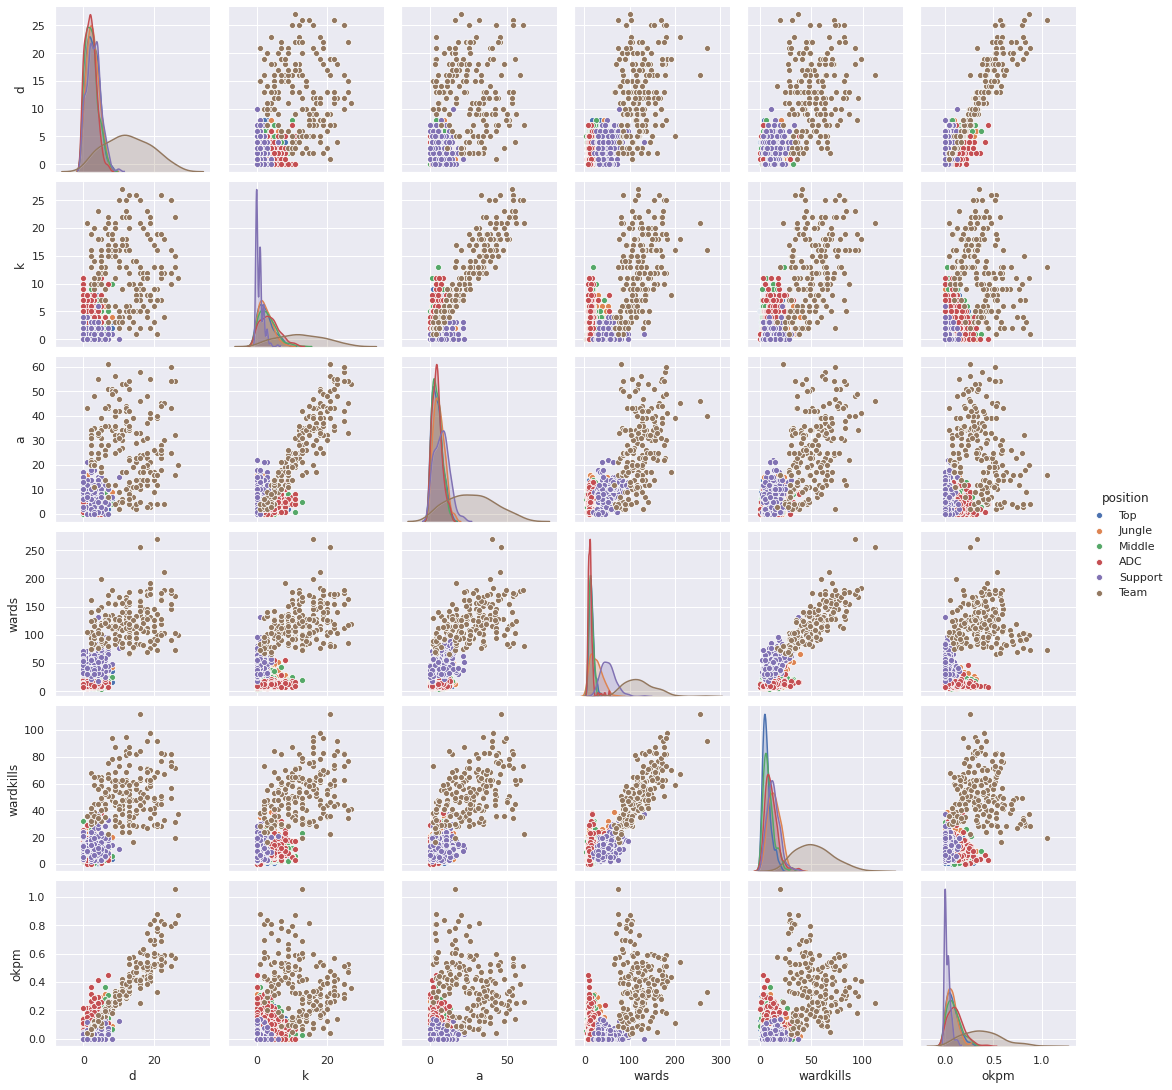

In [0]:
#This will visually demonstrate at firs glance if there are significant differences in 
#the distribution between player positions. It's expected that the individual positions 
#are more densely clustered than the team plots because the data plots of the team are
#aggregate of the five positions' stats.

sns.pairplot(rawvariablesdraft1, hue = 'position')

In [0]:
rawteamvariablesdraft1 = rawteam [['position','d','k','a','wards','wardkills','okpm']]
rawteamvariablesdraft1

position   d   k   a  wards  wardkills      okpm
10       Team  22   7  18    104         28  0.829146
11       Team   7  22  51     80         51  0.263819
22       Team  16   8  17    136         54  0.420315
23       Team   8  16  34    135         62  0.210158
34       Team   8  18  51    115         78  0.212860
35       Team  18   8  12    134         57  0.478936
46       Team  16  12  24    161         72  0.405234
47       Team  12  16  34    167         95  0.303926
58       Team  10   2   2    130         73  0.256301
59       Team   2  10  22    161         68  0.051260
70       Team   5  13  28     93         48  0.165837
71       Team  13   5  10    105         32  0.431177
82       Team  17  12  24    128         51  0.490857
83       Team  12  17  37    128         63  0.346487
94       Team   7   3   7    133         55  0.204380
95       Team   5   7  17    121         60  0.087591
106      Team  11  22  34    111         59  0.365044
107      Team  22  11  23    120         49  0.730088
118      Team  19  21  39    172         58  0.474604
119      Team  21  19  39    136         69  0.524563
130      Team  14   3   3     77         16  0.576527
131      Team   3  14  35     83         31  0.123542
142      Team  20   9  14    109         38  0.666297
143      Team   9  20  32    105         44  0.299833
154      Team  18   8  19    112         49  0.534653
155      Team   8  18  50    111         48  0.237624
166      Team  16  10  14    154         63  0.388664
167      Team  10  16  47    129         73  0.242915
178      Team  16  21  46    256        112  0.252300
179      Team  21  16  40    270         92  0.331143
190      Team   5  13  35     82         32  0.162602
191      Team  13   4  12     66         29  0.528455
202      Team  20  17  17    146         65  0.513699
203      Team  17  20  30    146         52  0.436644
214      Team  15   1   2     84         38  0.528479
215      Team   2  15  34    100         30  0.035232
226      Team  11  27  53    119         41  0.354458
227      Team  27  11  20    100         37  0.870032
238      Team   8  15  34    113         51  0.261296
239      Team  15   8  21    104         56  0.489929
250      Team  10  13  32    132         62  0.253700
251      Team  13  10  23    130         51  0.329810
262      Team  17   6  14    109         41  0.602837
263      Team   7  17  43     95         51  0.212766
274      Team   9  17  35    122         56  0.263543
275      Team  17   9  19    121         48  0.497804
286      Team  18  12  23    177         63  0.443714
287      Team  12  18  34    152         69  0.295809
298      Team  13   2   4     96         39  0.428101
299      Team   2  13  28     94         30  0.065862
310      Team   5  15  34     85         32  0.179211
311      Team  15   5   4     94         28  0.537634
322      Team   3  11  21     95         39  0.114431
323      Team  11   3   5     81         24  0.419580
334      Team  25  16  43    146         76  0.600000
335      Team  16  25  58    177         63  0.384000
346      Team  14  14  39    128         61  0.422961
347      Team  15  14  29    116         40  0.422961
358      Team  13   2   4     68         24  0.572267
359      Team   2  13  21     75         34  0.088041
370      Team   6  13  26    136         45  0.200111
371      Team  13   6   9     90         55  0.433574
382      Team   9  21  50     84         46  0.325694
383      Team  21   9  12    100         29  0.759952
394      Team   7  19  36    156         67  0.189274
395      Team  19   7  21    132         61  0.513745
406      Team   4  11  23     79         36  0.143198
407      Team  11   4   6     79         28  0.393795
418      Team   5  14  17    118         60  0.151439
419      Team  14   5  11    112         48  0.424028
430      Team  12  13  42    136         48  0.297398
431      Team  13  12  34    131         50  0.322181
442      Team   6   7  14    127         52  0.163488
443      

In [0]:
rawteamvariablesdraft2 = rawteam [['result','d','k','a','wards','wardkills','okpm']]
rawteamvariablesdraft2

result   d   k   a  wards  wardkills      okpm
10         0  22   7  18    104         28  0.829146
11         1   7  22  51     80         51  0.263819
22         0  16   8  17    136         54  0.420315
23         1   8  16  34    135         62  0.210158
34         1   8  18  51    115         78  0.212860
35         0  18   8  12    134         57  0.478936
46         0  16  12  24    161         72  0.405234
47         1  12  16  34    167         95  0.303926
58         0  10   2   2    130         73  0.256301
59         1   2  10  22    161         68  0.051260
70         1   5  13  28     93         48  0.165837
71         0  13   5  10    105         32  0.431177
82         0  17  12  24    128         51  0.490857
83         1  12  17  37    128         63  0.346487
94         0   7   3   7    133         55  0.204380
95         1   5   7  17    121         60  0.087591
106        1  11  22  34    111         59  0.365044
107        0  22  11  23    120         49  0.730088
118        1  19  21  39    172         58  0.474604
119        0  21  19  39    136         69  0.524563
130        0  14   3   3     77         16  0.576527
131        1   3  14  35     83         31  0.123542
142        0  20   9  14    109         38  0.666297
143        1   9  20  32    105         44  0.299833
154        0  18   8  19    112         49  0.534653
155        1   8  18  50    111         48  0.237624
166        0  16  10  14    154         63  0.388664
167        1  10  16  47    129         73  0.242915
178        1  16  21  46    256        112  0.252300
179        0  21  16  40    270         92  0.331143
190        1   5  13  35     82         32  0.162602
191        0  13   4  12     66         29  0.528455
202        0  20  17  17    146         65  0.513699
203        1  17  20  30    146         52  0.436644
214        0  15   1   2     84         38  0.528479
215        1   2  15  34    100         30  0.035232
226        1  11  27  53    119         41  0.354458
227        0  27  11  20    100         37  0.870032
238        1   8  15  34    113         51  0.261296
239        0  15   8  21    104         56  0.489929
250        1  10  13  32    132         62  0.253700
251        0  13  10  23    130         51  0.329810
262        0  17   6  14    109         41  0.602837
263        1   7  17  43     95         51  0.212766
274        1   9  17  35    122         56  0.263543
275        0  17   9  19    121         48  0.497804
286        0  18  12  23    177         63  0.443714
287        1  12  18  34    152         69  0.295809
298        0  13   2   4     96         39  0.428101
299        1   2  13  28     94         30  0.065862
310        1   5  15  34     85         32  0.179211
311        0  15   5   4     94         28  0.537634
322        1   3  11  21     95         39  0.114431
323        0  11   3   5     81         24  0.419580
334        1  25  16  43    146         76  0.600000
335        0  16  25  58    177         63  0.384000
346        1  14  14  39    128         61  0.422961
347        0  15  14  29    116         40  0.422961
358        0  13   2   4     68         24  0.572267
359        1   2  13  21     75         34  0.088041
370        1   6  13  26    136         45  0.200111
371        0  13   6   9     90         55  0.433574
382        1   9  21  50     84         46  0.325694
383        0  21   9  12    100         29  0.759952
394        1   7  19  36    156         67  0.189274
395        0  19   7  21    132         61  0.513745
406        1   4  11  23     79         36  0.143198
407        0  11   4   6     79         28  0.393795
418        1   5  14  17    118         60  0.151439
419        0  14   5  11    112         48  0.424028
430        1  12  13  42    136         48  0.297398
431        0  13  12  34    131         50  0.322181
442        0   6   7  14    127         52  0.163488
443        1   7   6  12    115         64  0.190736
454        1  26  22  54    169

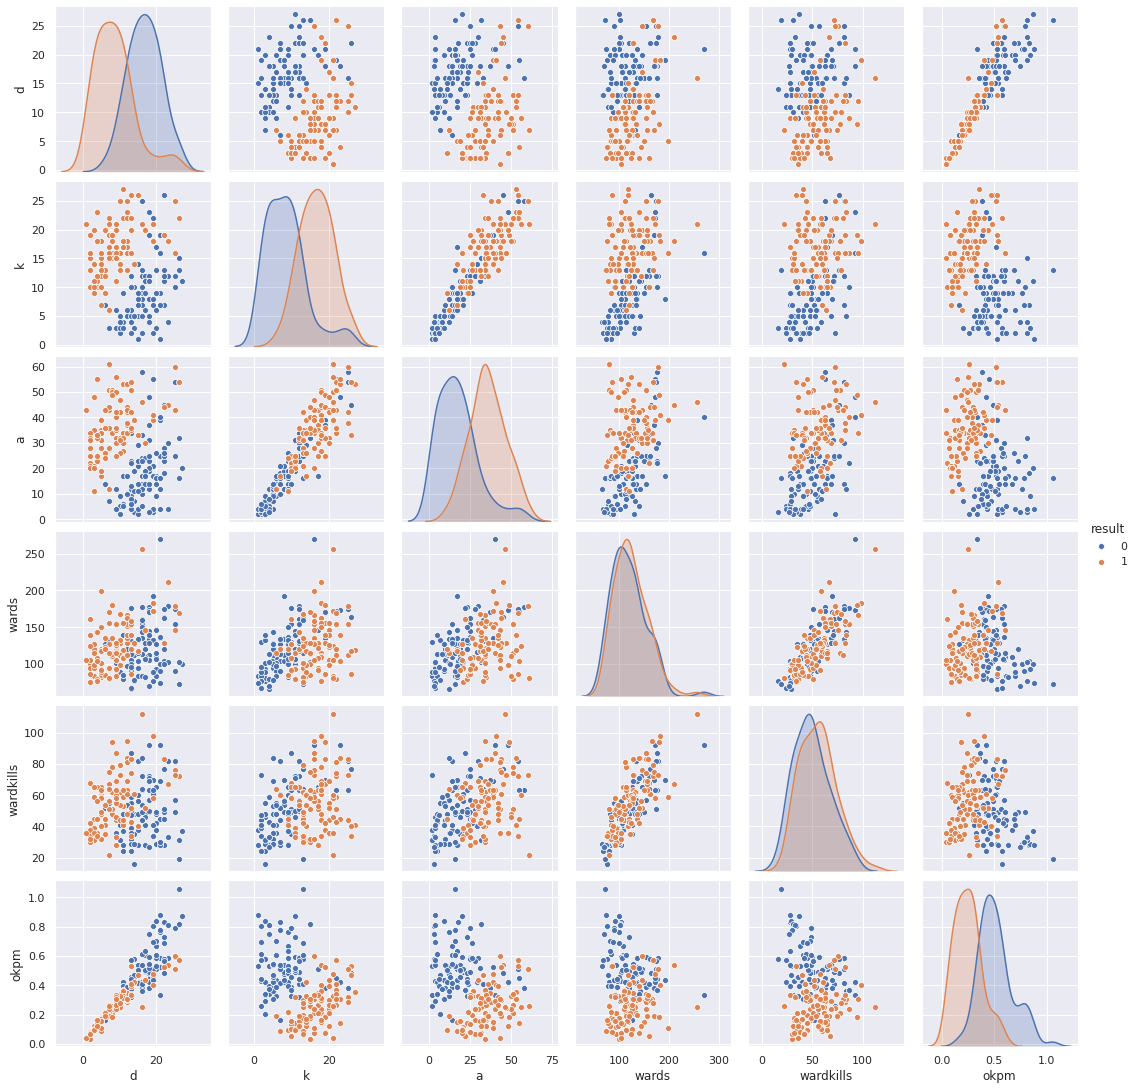

In [0]:
#Is it reasonable to test a selfish ratio? Looking at the team density plots would 
#suggest that there may be an aggregate effect; that a win or loss is definitely 
#influenced by the specific metrics with distinct disrubtions.

sns.pairplot(rawteamvariablesdraft2, hue = 'result')

And so it is! There are some metrics that are derivative of core stats like the number of kills (k) such as opponent kills per minute (okpm); a high okpm suggests that the opposing team was more effective at advancing their position in the game. Thus, I think  it would be reasonable to investigate the root cause, factors such as 'k','d', and 'a'. To combine measures that would gauge individual as well as team performance in a single  metric, I think a kill assist ratio would be worth looking into. Kills reflect a player's personal prowess; although a kill registers when a champion serves the death blow, it is not reflective of total damage done to the champion that led up to the opponents death. Translation: one of your team mates could have done all the work to deplete the enemy's health, but you would get credit for the kill if you struck the final blow.

In [0]:
rawsupport = raw[raw.position.str.contains('Support')]
rawsupport

gameid                                                url league  \
4     1070340  https://matchhistory.euw.leagueoflegends.com/e...     WC   
9     1070340  https://matchhistory.euw.leagueoflegends.com/e...     WC   
16    1070330  https://matchhistory.euw.leagueoflegends.com/e...     WC   
21    1070330  https://matchhistory.euw.leagueoflegends.com/e...     WC   
28    1070349  https://matchhistory.euw.leagueoflegends.com/e...     WC   
33    1070349  https://matchhistory.euw.leagueoflegends.com/e...     WC   
40    1070359  https://matchhistory.euw.leagueoflegends.com/e...     WC   
45    1070359  https://matchhistory.euw.leagueoflegends.com/e...     WC   
52    1070365  https://matchhistory.euw.leagueoflegends.com/e...     WC   
57    1070365  https://matchhistory.euw.leagueoflegends.com/e...     WC   
64    1070378  http://matchhistory.na.leagueoflegends.com/en/...     WC   
69    1070378  http://matchhistory.na.leagueoflegends.com/en/...     WC   
76    1070393  https://matchhistory.euw.leagueoflegends.com/e...     WC   
81    1070393  https://matchhistory.euw.leagueoflegends.com/e...     WC   
88    1070420  https://matchhistory.euw.leagueoflegends.com/e...     WC   
93    1070420  https://matchhistory.euw.leagueoflegends.com/e...     WC   
100   1070445  https://matchhistory.euw.leagueoflegends.com/e...     WC   
105   1070445  https://matchhistory.euw.leagueoflegends.com/e...     WC   
112   1070457  https://matchhistory.euw.leagueoflegends.com/e...     WC   
117   1070457  https://matchhistory.euw.leagueoflegends.com/e...     WC   
124   1070463  https://matchhistory.euw.leagueoflegends.com/e...     WC   
129   1070463  https://matchhistory.euw.leagueoflegends.com/e...     WC   
136   1070475  http://matchhistory.na.leagueoflegends.com/en/...     WC   
141   1070475  http://matchhistory.na.leagueoflegends.com/en/...     WC   
148   1070531  http://matchhistory.na.leagueoflegends.com/en/...     WC   
153   1070531  http://matchhistory.na.leagueoflegends.com/en/...     WC   
160   1070547  http://matchhistory.na.leagueoflegends.com/en/...     WC   
165   1070547  http://matchhistory.na.leagueoflegends.com/en/...     WC   
172   1070555  http://matchhistory.na.leagueoflegends.com/en/...     WC   
177   1070555  http://matchhistory.na.leagueoflegends.com/en/...     WC   
184   1070569  http://matchhistory.na.leagueoflegends.com/en/...     WC   
189   1070569  http://matchhistory.na.leagueoflegends.com/en/...     WC   
196   1070580  http://matchhistory.na.leagueoflegends.com/en/...     WC   
201   1070580  http://matchhistory.na.leagueoflegends.com/en/...     WC   
208   1070599  https://matchhistory.euw.leagueoflegends.com/e...     WC   
213   1070599  https://matchhistory.euw.leagueoflegends.com/e...     WC   
220   1070624  http://matchhistory.na.leagueoflegends.com/en/...     WC   
225   1070624  http://matchhistory.na.leagueoflegends.com/en/...     WC   
232   1070668  http://matchhistory.na.leagueoflegends.com/en/...     WC   
237   1070668  http://matchhistory.na.leagueoflegends.com/en/...     WC   
244   1060543  https://matchhistory.na.leagueoflegends.com/en...     WC   
249   1060543  https://matchhistory.na.leagueoflegends.com/en...     WC   
256   1060559  http://matchhistory.na.leagueoflegends.com/en/...     WC   
261   1060559  http://matchhistory.na.leagueoflegends.com/en/...     WC   
268   1060585  http://matchhistory.na.leagueoflegends.com/en/...     WC   
273   1060585  http://matchhistory.na.leagueoflegends.com/en/...     WC   
280   1060612  http://matchhistory.na.leagueoflegends.com/en/...     WC   
285   1060612  http://matchhistory.na.leagueoflegends.com/en/...     WC   
292   1060652  http://matchhistory.na.leagueoflegends.com/en/...     WC   
297   1060652  http://matchhistory.na.leagueoflegends.com/en/...     WC   
304   1060665  http://matchhistory.na.leagueoflegends.com/en/...     WC   
309   1060665  http://matchhistory.na.leagueoflegends.com/en/...     WC   
316   1070918  https://matchhist

In [0]:
rawsupportvariables = rawsupport [['result','d','k','a','wards','wardkills','okpm']]
rawteamvariables = rawteam [['result','d','k','a','wards','wardkills','okpm']]

In [0]:
rawsupportvariables['killassistratio'] = rawsupportvariables['k']/rawsupportvariables['a']
rawteamvariables['killassistratio'] = rawteamvariables['k']/rawteamvariables['a']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
rawteamvariables.shape

(184, 8)

In [0]:
rawsupportvariables.shape

(184, 8)

In [0]:
rawsupportvariables['result'] = rawsupportvariables.replace((0,1),("Loss","Win"))
rawteamvariables['result'] = rawteamvariables.replace((0,1),("Loss","Win"))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
rawsupportvariables

result   d  k   a  wards  wardkills      okpm  killassistratio
4      Loss   5  2   2     47          8  0.000000         1.000000
9       Win   3  0  18     30         13  0.075377         0.000000
16     Loss   2  0   4     47         12  0.026270         0.000000
21      Win   3  1   9     56         10  0.000000         0.111111
28      Win   0  0  12     53         14  0.000000         0.000000
33     Loss   4  0   3     54          8  0.000000         0.000000
40     Loss   3  1   8     63         18  0.000000         0.125000
45      Win   3  0  10     78         27  0.025327         0.000000
52     Loss   1  0   1     72         16  0.000000         0.000000
57      Win   0  0   8     71         11  0.000000         0.000000
64      Win   0  1   9     42         14  0.033167         0.111111
69     Loss   4  1   2     53          8  0.033167         0.500000
76     Loss   3  0   8     56         22  0.000000         0.000000
81      Win   4  0  12     59         12  0.000000         0.000000
88     Loss   1  1   2     55         16  0.000000         0.500000
93      Win   1  0   6     57          9  0.029197         0.000000
100     Win   5  0   7     52         19  0.033186         0.000000
105    Loss   3  1   5     51          8  0.000000         0.200000
112     Win   3  1  11     63         15  0.024979         0.090909
117    Loss   4  1  13     63         27  0.024979         0.076923
124    Loss   4  0   1     34          2  0.041181         0.000000
129     Win   1  1  10     41          8  0.000000         0.100000
136    Loss   3  1   2     45         10  0.000000         0.500000
141     Win   3  0  10     45         21  0.033315         0.000000
148    Loss   5  0   4     52         14  0.089109         0.000000
153     Win   0  3  14     44         11  0.000000         0.214286
160    Loss   6  0   6     62         21  0.000000         0.000000
165     Win   2  0  14     63         17  0.000000         0.000000
172     Win   4  1  12    132         37  0.000000         0.083333
177    Loss   5  0  13     96         16  0.015769         0.000000
184     Win   2  0   9     22          5  0.040650         0.000000
189    Loss   2  1   2     30          4  0.000000         0.500000
196    Loss   3  1   3     77          9  0.000000         0.333333
201     Win   4  0   9     58         15  0.025685         0.000000
208    Loss   3  0   0     42          4  0.035232              NaN
213     Win   0  1   9     38          6  0.000000         0.111111
220     Win   2  0  22     52         12  0.032223         0.000000
225    Loss   8  1   7     49         14  0.000000         0.142857
232     Win   4  1   9     47         10  0.065324         0.111111
237    Loss   4  2   6     49         21  0.032662         0.333333
244     Win   0  0  11     62         24  0.025370         0.000000
249    Loss   3  1   7     63          7  0.000000         0.142857
256    Loss   6  0   5     45         11  0.070922         0.000000
261     Win   1  2  14     38         18  0.000000         0.142857
268     Win   2  1   9     59         16  0.000000         0.111111
273    Loss   3  0   6     51         13  0.029283         0.000000
280    Loss   6  1   6     74         12  0.024651         0.166667
285     Win   2  1   7     72         15  0.024651         0.142857
292    Loss   3  0   1     42         13  0.032931         0.000000
297     Win   0  1   9     38          4  0.000000         0.111111
304     Win   0  0  10     28         10  0.000000         0.000000
309    Loss   6  0   0     47          5  0.000000              NaN
316     Win   1  1   7     47         10  0.038144         0.142857
321    Loss   1  1   1     41         11  0.038144         1.000000
328     Win   7  2  10     73         33  0.072000         0.200000
333    Loss   2  3  21     62         10  0.048000         0.142857
340     Win   4  1  10     49         10  0.060423         0.100000
345    Loss   3  2  10     53         19  0.030211         0.

In [0]:
rawteamvariables

result   d   k   a  wards  wardkills      okpm  killassistratio
10     Loss  22   7  18    104         28  0.829146         0.388889
11      Win   7  22  51     80         51  0.263819         0.431373
22     Loss  16   8  17    136         54  0.420315         0.470588
23      Win   8  16  34    135         62  0.210158         0.470588
34      Win   8  18  51    115         78  0.212860         0.352941
35     Loss  18   8  12    134         57  0.478936         0.666667
46     Loss  16  12  24    161         72  0.405234         0.500000
47      Win  12  16  34    167         95  0.303926         0.470588
58     Loss  10   2   2    130         73  0.256301         1.000000
59      Win   2  10  22    161         68  0.051260         0.454545
70      Win   5  13  28     93         48  0.165837         0.464286
71     Loss  13   5  10    105         32  0.431177         0.500000
82     Loss  17  12  24    128         51  0.490857         0.500000
83      Win  12  17  37    128         63  0.346487         0.459459
94     Loss   7   3   7    133         55  0.204380         0.428571
95      Win   5   7  17    121         60  0.087591         0.411765
106     Win  11  22  34    111         59  0.365044         0.647059
107    Loss  22  11  23    120         49  0.730088         0.478261
118     Win  19  21  39    172         58  0.474604         0.538462
119    Loss  21  19  39    136         69  0.524563         0.487179
130    Loss  14   3   3     77         16  0.576527         1.000000
131     Win   3  14  35     83         31  0.123542         0.400000
142    Loss  20   9  14    109         38  0.666297         0.642857
143     Win   9  20  32    105         44  0.299833         0.625000
154    Loss  18   8  19    112         49  0.534653         0.421053
155     Win   8  18  50    111         48  0.237624         0.360000
166    Loss  16  10  14    154         63  0.388664         0.714286
167     Win  10  16  47    129         73  0.242915         0.340426
178     Win  16  21  46    256        112  0.252300         0.456522
179    Loss  21  16  40    270         92  0.331143         0.400000
190     Win   5  13  35     82         32  0.162602         0.371429
191    Loss  13   4  12     66         29  0.528455         0.333333
202    Loss  20  17  17    146         65  0.513699         1.000000
203     Win  17  20  30    146         52  0.436644         0.666667
214    Loss  15   1   2     84         38  0.528479         0.500000
215     Win   2  15  34    100         30  0.035232         0.441176
226     Win  11  27  53    119         41  0.354458         0.509434
227    Loss  27  11  20    100         37  0.870032         0.550000
238     Win   8  15  34    113         51  0.261296         0.441176
239    Loss  15   8  21    104         56  0.489929         0.380952
250     Win  10  13  32    132         62  0.253700         0.406250
251    Loss  13  10  23    130         51  0.329810         0.434783
262    Loss  17   6  14    109         41  0.602837         0.428571
263     Win   7  17  43     95         51  0.212766         0.395349
274     Win   9  17  35    122         56  0.263543         0.485714
275    Loss  17   9  19    121         48  0.497804         0.473684
286    Loss  18  12  23    177         63  0.443714         0.521739
287     Win  12  18  34    152         69  0.295809         0.529412
298    Loss  13   2   4     96         39  0.428101         0.500000
299     Win   2  13  28     94         30  0.065862         0.464286
310     Win   5  15  34     85         32  0.179211         0.441176
311    Loss  15   5   4     94         28  0.537634         1.250000
322     Win   3  11  21     95         39  0.114431         0.523810
323    Loss  11   3   5     81         24  0.419580         0.600000
334     Win  25  16  43    146         76  0.600000         0.372093
335    Loss  16  25  58    177         63  0.384000         0.431034
346     Win  14  14  39    128         61  0.422961         0.358974
347

In [0]:
rawteamvariables.isnull().sum()

result             0
d                  0
k                  0
a                  0
wards              0
wardkills          0
okpm               0
killassistratio    0
dtype: int64

In [0]:
rawsupportvariables.isnull().sum()

result             0
d                  0
k                  0
a                  0
wards              0
wardkills          0
okpm               0
killassistratio    4
dtype: int64

In [0]:
rawsupportvariables = rawsupportvariables.replace(np.NaN)
rawsupportvariables.isnull().sum()

result             0
d                  0
k                  0
a                  0
wards              0
wardkills          0
okpm               0
killassistratio    0
dtype: int64

In [0]:
rawsupportvariables = rawsupportvariables[rawsupportvariables['killassistratio']<=1]
rawsupportvariables.shape

(181, 8)

In [0]:
rawteamvariables = rawteamvariables[rawteamvariables['killassistratio']<=1]
rawteamvariables.shape

(181, 8)

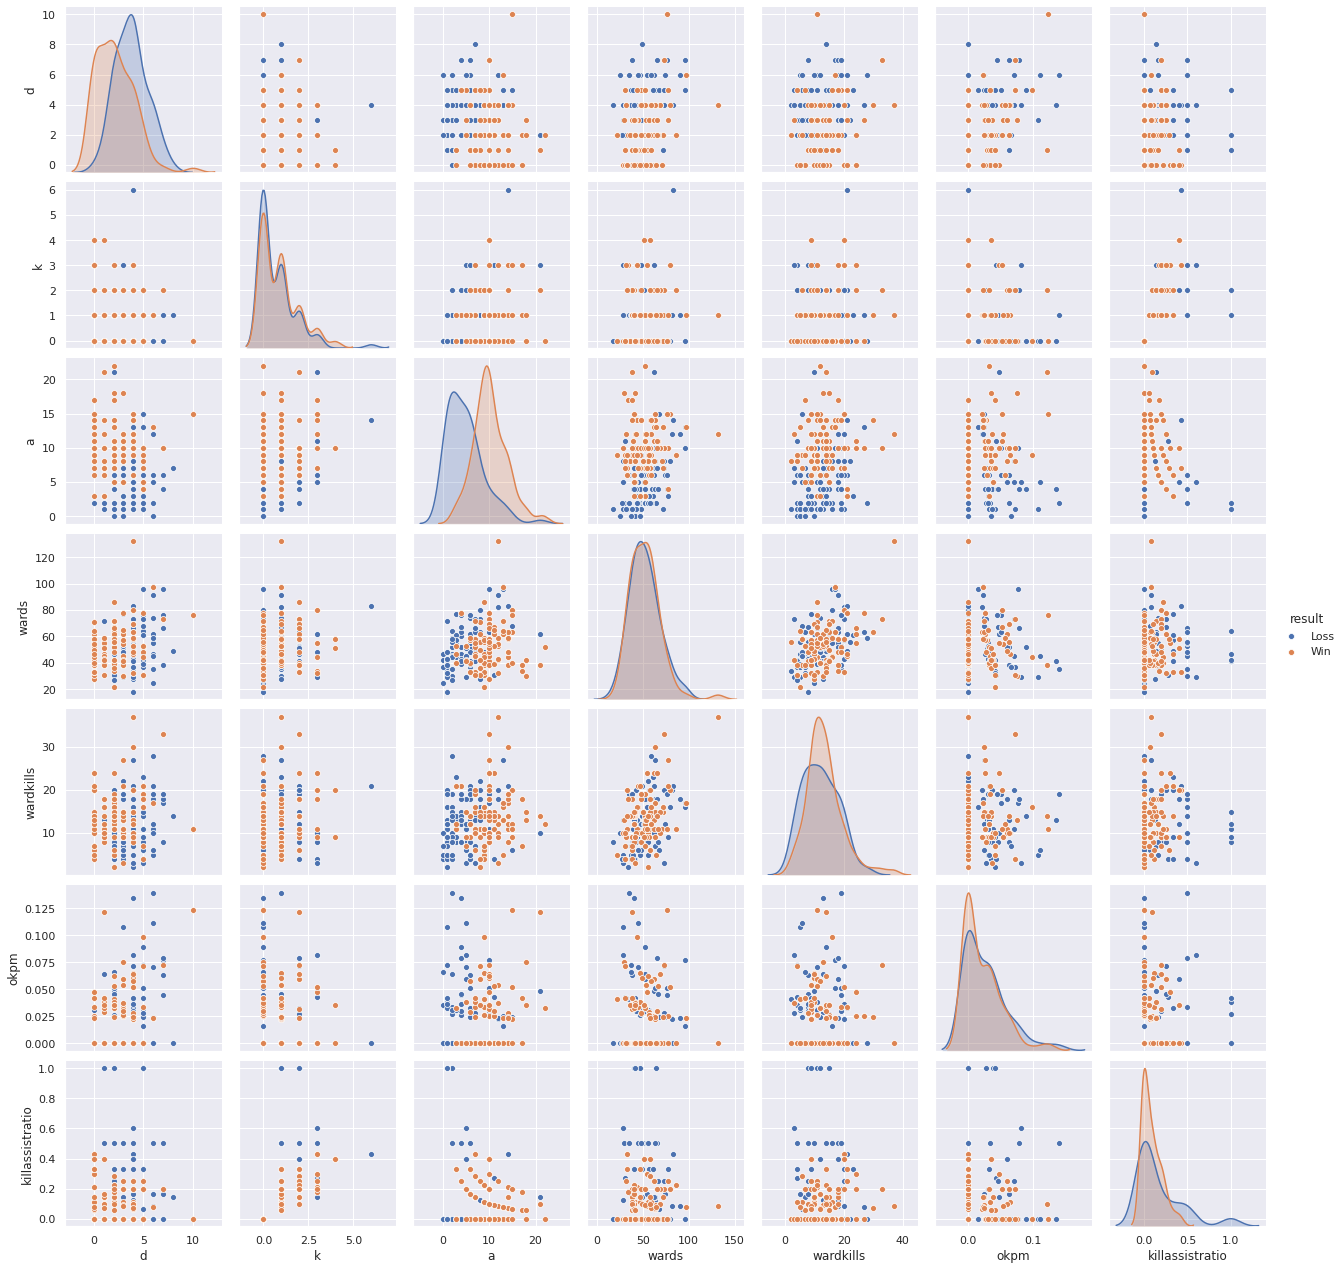

In [0]:
sns.pairplot(rawsupportvariables, hue = 'result')

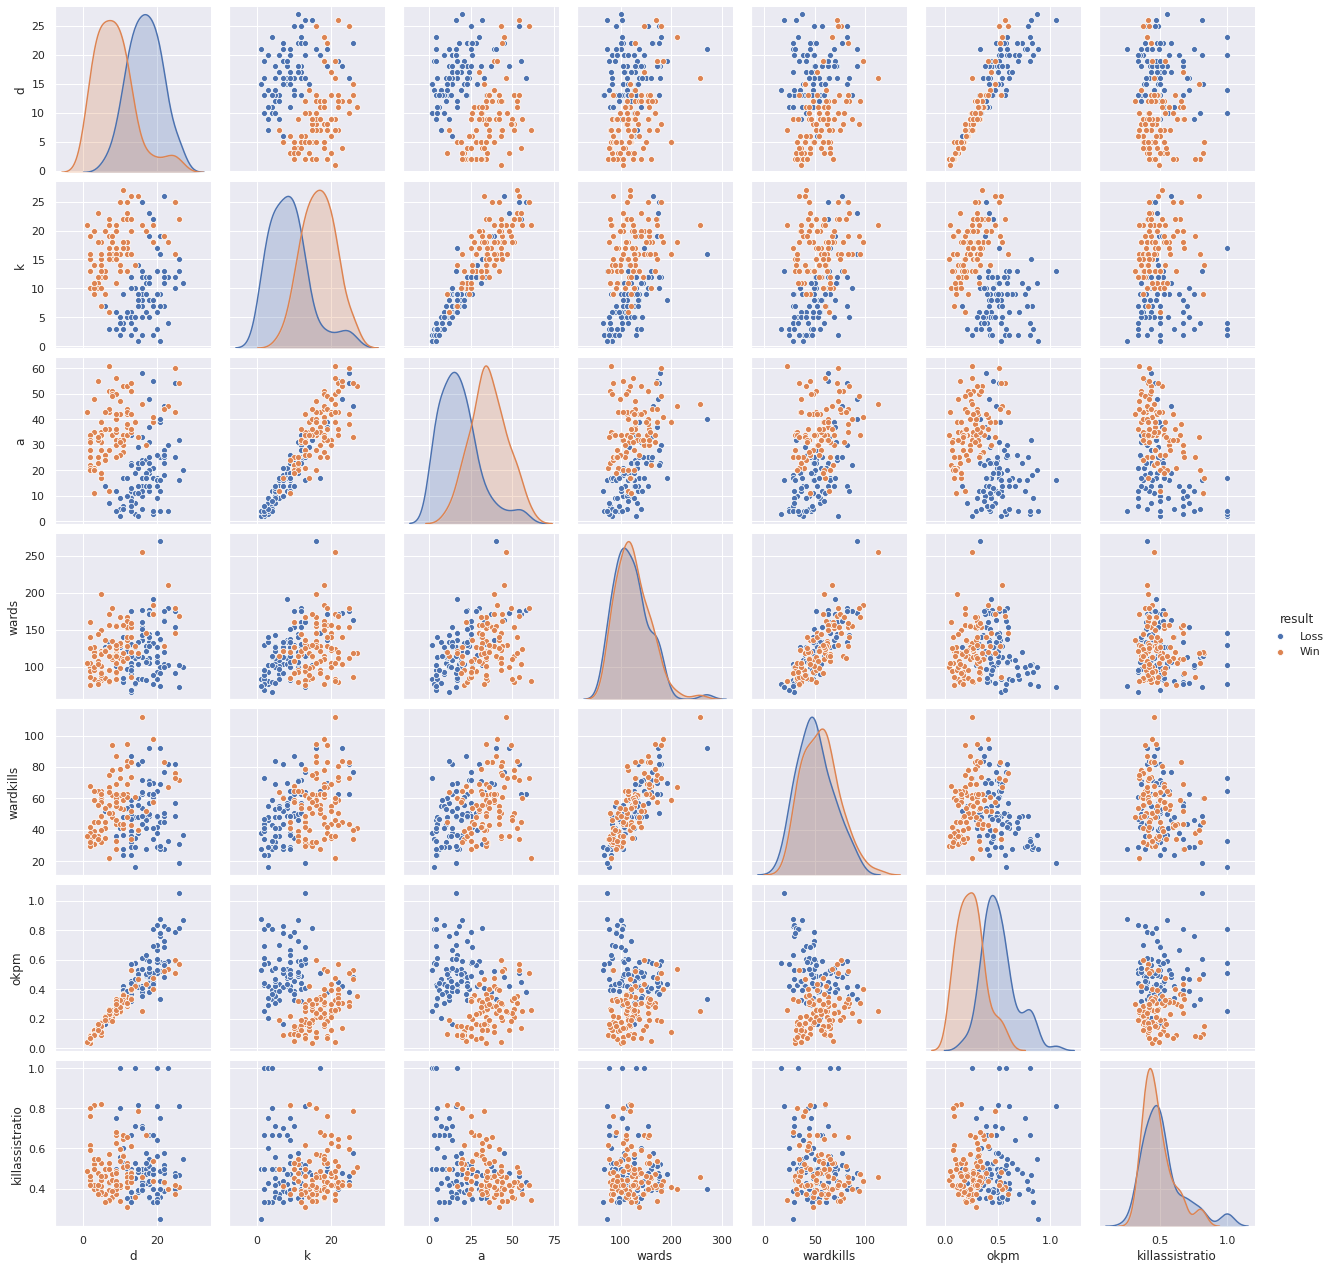

In [0]:
sns.pairplot(rawteamvariables, hue = 'result')

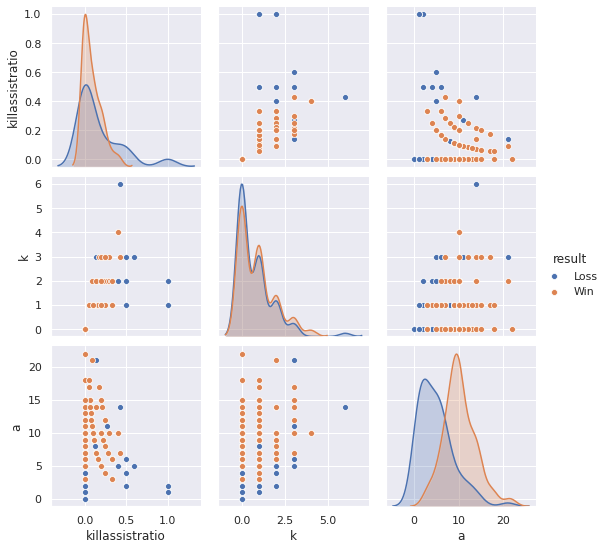

In [0]:
rawsupportvariablestest = rawsupportvariables[['killassistratio','k','a','result']]
sns.pairplot(rawsupportvariablestest, hue='result')

In [0]:
rawsupportvariablesloss = rawsupportvariablestest[rawsupportvariablestest.result.str.contains('Loss')]
rawsupportvariablesloss

killassistratio  k   a result
4            1.000000  2   2   Loss
16           0.000000  0   4   Loss
33           0.000000  0   3   Loss
40           0.125000  1   8   Loss
52           0.000000  0   1   Loss
69           0.500000  1   2   Loss
76           0.000000  0   8   Loss
88           0.500000  1   2   Loss
105          0.200000  1   5   Loss
117          0.076923  1  13   Loss
124          0.000000  0   1   Loss
136          0.500000  1   2   Loss
148          0.000000  0   4   Loss
160          0.000000  0   6   Loss
177          0.000000  0  13   Loss
189          0.500000  1   2   Loss
196          0.333333  1   3   Loss
208          0.000000  0   0   Loss
225          0.142857  1   7   Loss
237          0.333333  2   6   Loss
249          0.142857  1   7   Loss
256          0.000000  0   5   Loss
273          0.000000  0   6   Loss
280          0.166667  1   6   Loss
292          0.000000  0   1   Loss
309          0.000000  0   0   Loss
321          1.000000  1   1   Loss
333          0.142857  3  21   Loss
345          0.200000  2  10   Loss
352          0.000000  0   1   Loss
369          0.000000  0   3   Loss
381          0.000000  0   1   Loss
393          1.000000  2   2   Loss
405          0.000000  0   1   Loss
417          0.000000  0   3   Loss
429          0.000000  0   8   Loss
436          0.000000  0   4   Loss
453          0.083333  1  12   Loss
465          0.166667  1   6   Loss
477          0.000000  0   7   Loss
489          0.250000  2   8   Loss
501          0.166667  1   6   Loss
508          0.125000  1   8   Loss
525          0.000000  0   2   Loss
537          0.000000  0   1   Loss
544          0.000000  0   6   Loss
561          0.000000  0   7   Loss
585          0.083333  1  12   Loss
597          0.000000  0  10   Loss
604          0.400000  2   5   Loss
616          0.000000  0   4   Loss
628          0.000000  0   2   Loss
645          0.272727  3  11   Loss
652          0.500000  2   4   Loss
664          0.066667  1  15   Loss
681          0.333333  2   6   Loss
688          0.000000  0   6   Loss
705          0.500000  2   4   Loss
717          0.600000  3   5   Loss
729          0.000000  0   2   Loss
736          1.000000  1   1   Loss
748          0.000000  0   4   Loss
760          0.250000  1   4   Loss
772          0.500000  3   6   Loss
789          0.000000  0   0   Loss
796          0.500000  1   2   Loss
808          0.500000  1   2   Loss
820          0.166667  1   6   Loss
837          0.000000  0   9   Loss
849          0.000000  0   4   Loss
861          1.000000  1   1   Loss
873          0.000000  0  10   Loss
885          0.000000  0   2   Loss
897          0.000000  0   1   Loss
904          0.000000  0   0   Loss
916          0.000000  0  10   Loss
928          0.333333  2   6   Loss
940          0.000000  0   1   Loss
964          0.000000  0   7   Loss
976          0.428571  6  14   Loss
988          0.000000  0   5   Loss
1000         0.000000  0   4   Loss
1017         0.333333  1   3   Loss
1029         0.000000  0   3   Loss
1036         0.000000  0   2   Loss
1048         0.000000  0   2   Loss
1065         0.000000  0   6   Loss
1077         0.400000  2   5   Loss
1089         0.000000  0   1   Loss

In [0]:
rawsupportvariableswin = rawsupportvariablestest[rawsupportvariablestest.result.str.contains('Win')]
rawsupportvariableswin

killassistratio  k   a result
9            0.000000  0  18    Win
21           0.111111  1   9    Win
28           0.000000  0  12    Win
45           0.000000  0  10    Win
57           0.000000  0   8    Win
64           0.111111  1   9    Win
81           0.000000  0  12    Win
93           0.000000  0   6    Win
100          0.000000  0   7    Win
112          0.090909  1  11    Win
129          0.100000  1  10    Win
141          0.000000  0  10    Win
153          0.214286  3  14    Win
165          0.000000  0  14    Win
172          0.083333  1  12    Win
184          0.000000  0   9    Win
201          0.000000  0   9    Win
213          0.111111  1   9    Win
220          0.000000  0  22    Win
232          0.111111  1   9    Win
244          0.000000  0  11    Win
261          0.142857  2  14    Win
268          0.111111  1   9    Win
285          0.142857  1   7    Win
297          0.111111  1   9    Win
304          0.000000  0  10    Win
316          0.142857  1   7    Win
328          0.200000  2  10    Win
340          0.100000  1  10    Win
357          0.000000  0   9    Win
364          0.000000  0   8    Win
376          0.222222  2   9    Win
388          0.083333  1  12    Win
400          0.428571  3   7    Win
412          0.000000  0   7    Win
424          0.000000  0  13    Win
441          0.000000  0   3    Win
448          0.066667  1  15    Win
460          0.200000  2  10    Win
472          0.090909  1  11    Win
484          0.300000  3  10    Win
496          0.000000  0   9    Win
513          0.000000  0  14    Win
520          0.285714  2   7    Win
532          0.000000  0   8    Win
549          0.000000  0  11    Win
556          0.100000  1  10    Win
573          0.000000  0   3    Win
580          0.076923  1  13    Win
592          0.176471  3  17    Win
609          0.250000  2   8    Win
621          0.166667  1   6    Win
633          0.000000  0   7    Win
640          0.200000  2  10    Win
657          0.200000  3  15    Win
669          0.071429  1  14    Win
676          0.000000  0   6    Win
693          0.200000  2  10    Win
700          0.000000  0  11    Win
712          0.095238  2  21    Win
724          0.000000  0  13    Win
741          0.000000  0   5    Win
753          0.222222  2   9    Win
765          0.142857  2  14    Win
777          0.000000  0   9    Win
784          0.000000  0   9    Win
801          0.400000  4  10    Win
813          0.000000  0   8    Win
825          0.000000  0  12    Win
832          0.000000  0  14    Win
844          0.071429  1  14    Win
856          0.058824  1  17    Win
868          0.200000  2  10    Win
880          0.000000  0  12    Win
892          0.066667  1  15    Win
909          0.333333  2   6    Win
921          0.200000  1   5    Win
933          0.000000  0   8    Win
945          0.076923  1  13    Win
957          0.055556  1  18    Win
969          0.250000  1   4    Win
981          0.000000  0  15    Win
993          0.250000  3  12    Win
1005         0.400000  4  10    Win
1012         0.000000  0  11    Win
1024         0.200000  1   5    Win
1041         0.333333  1   3    Win
1053         0.000000  0  10    Win
1060         0.100000  1  10    Win
1072         0.000000  0  10    Win
1084         0.000000  0   8    Win
1096         0.000000  0   7    Win

In [0]:
rawsupportvariables['killassistratio'].describe()

count    181.000000
mean       0.134158
std        0.208167
min        0.000000
25%        0.000000
50%        0.055556
75%        0.200000
max        1.000000
Name: killassistratio, dtype: float64

(0.0, 60.0)

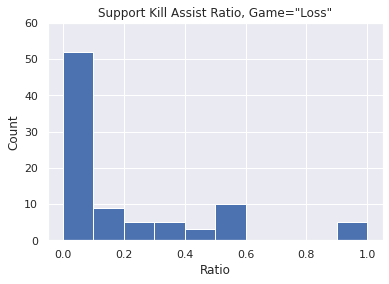

In [0]:
rawsupportvariablesloss['killassistratio'].hist(range=[0,1])
plt.title('Support Kill Assist Ratio, Game="Loss"')
plt.xlabel('Ratio')
plt.ylabel('Count')
plt.ylim(0,60)

(0.0, 60.0)

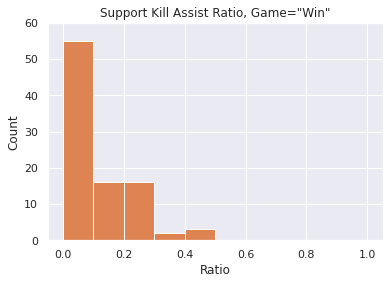

In [0]:
rawsupportvariableswin['killassistratio'].hist(range=[0,1], color = '#DD8452')
plt.title('Support Kill Assist Ratio, Game="Win"')
plt.xlabel('Ratio')
plt.ylabel('Count')
plt.ylim(0,60)

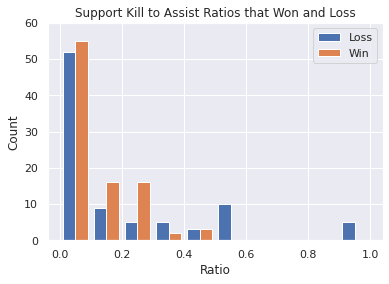

In [0]:
plt.hist([rawsupportvariablesloss['killassistratio'],rawsupportvariableswin['killassistratio']],range=[0,1])
plt.title('Support Kill to Assist Ratios that Won and Loss')
plt.xlabel('Ratio')
plt.ylabel('Count')
plt.ylim(0,60)
plt.legend(["Loss","Win"])

In [0]:
meanrawsupportvariablesloss = rawsupportvariablesloss['killassistratio'].mean()
meanrawsupportvariableswin = rawsupportvariableswin['killassistratio'].mean()
nrawsupportvariableswin = len(rawsupportvariablesloss['killassistratio'])
nrawsupportvariablesloss = len(rawsupportvariableswin['killassistratio'])
dofrawsupportvariableswin = nrawsupportvariableswin - 1
dofrawsupportvariablesloss = nrawsupportvariablesloss - 1
samplestdrawsupportvariablesloss = np.std(rawsupportvariablesloss['killassistratio'])
samplestdrawsupportvariableswin = np.std(rawsupportvariableswin['killassistratio'])
stderrorrawsupportvariablesloss = samplestdrawsupportvariablesloss/(nrawsupportvariablesloss**.5)
stderrorrawsupportvariableswin = samplestdrawsupportvariableswin/(nrawsupportvariableswin**.5)

In [0]:
meanrawsupportvariablesloss

0.17779168397145928

In [0]:
meanrawsupportvariableswin

0.09194623577615904

In [0]:
stderrorrawsupportvariablesloss

0.027877106841761767

In [0]:
stderrorrawsupportvariableswin

0.011609183059173373

In [0]:
ttest_1samp(rawsupportvariablesloss['killassistratio'],meanrawsupportvariableswin)

Ttest_1sampResult(statistic=3.0117366590525765, pvalue=0.0033905421960165726)

Because the t-statistic of the average kill assist ratio for winning Support positions has a high absolute t-statistic and p-value  below .05, we can strongly reject the null hypothesis that the winning Support position KARs is not significantly different from losing Support position KARs; a lower KAR is indeed strongly associated with winning.

In [0]:
rawpositionskar = rawpositions[['result','position','k','a']]
rawpositionskar.head(30)

result position   k   a
0        0      Top   0   4
1        0   Jungle   1   5
2        0   Middle   1   6
3        0      ADC   3   1
4        0  Support   2   2
5        1      Top   1  12
6        1   Jungle   7   6
7        1   Middle   3  10
8        1      ADC  11   5
9        1  Support   0  18
12       0      Top   3   4
13       0   Jungle   1   6
14       0   Middle   1   1
15       0      ADC   3   2
16       0  Support   0   4
17       1      Top   2  11
18       1   Jungle   3   4
19       1   Middle   5   6
20       1      ADC   5   4
21       1  Support   1   9
24       1      Top   1  14
25       1   Jungle   0  16
26       1   Middle  10   4
27       1      ADC   7   5
28       1  Support   0  12
29       0      Top   3   2
30       0   Jungle   2   2
31       0   Middle   2   1
32       0      ADC   1   4
33       0  Support   0   3

In [0]:
rawpositionskar['result'] = rawpositionskar.replace((0,1),("Loss","Win"))
rawpositionskar.head(20)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


result position   k   a
0    Loss      Top   0   4
1    Loss   Jungle   1   5
2    Loss   Middle   1   6
3    Loss      ADC   3   1
4    Loss  Support   2   2
5     Win      Top   1  12
6     Win   Jungle   7   6
7     Win   Middle   3  10
8     Win      ADC  11   5
9     Win  Support   0  18
12   Loss      Top   3   4
13   Loss   Jungle   1   6
14   Loss   Middle   1   1
15   Loss      ADC   3   2
16   Loss  Support   0   4
17    Win      Top   2  11
18    Win   Jungle   3   4
19    Win   Middle   5   6
20    Win      ADC   5   4
21    Win  Support   1   9

In [0]:
rawpositionskar['killassistratio']=rawpositionskar['k']/rawpositionskar['a']
rawpositionskar.isnull().sum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


result              0
position            0
k                   0
a                   0
killassistratio    18
dtype: int64

In [0]:
rawpositionskar = rawpositionskar.replace(np.NaN)
rawpositionskar.isnull().sum()

result             0
position           0
k                  0
a                  0
killassistratio    0
dtype: int64

In [0]:
rawpositionskar.shape

(920, 5)

In [0]:
rawpositionskar = rawpositionskar[rawpositionskar['killassistratio']<=1]
rawpositionskar.shape

(726, 5)

In [0]:
rawpositionskarwpositions = rawpositionskar[rawpositionskar['result']=='Win']
rawpositionskarlpositions = rawpositionskar[rawpositionskar['result']=='Loss']

In [0]:
rawpositionskartop = rawpositionskar[rawpositionskar.position.str.contains('Top')]
rawpositionskarmid = rawpositionskar[rawpositionskar.position.str.contains('Middle')]
rawpositionskarjg = rawpositionskar[rawpositionskar.position.str.contains('Jungle')]
rawpositionskarsupp = rawpositionskar[rawpositionskar.position.str.contains('Support')]
rawpositionskaradc = rawpositionskar[rawpositionskar.position.str.contains('ADC')]

In [0]:
rawpositionskartopw = rawpositionskartop[rawpositionskartop.result.str.contains('Win')]
rawpositionskarmidw = rawpositionskarmid[rawpositionskarmid.result.str.contains('Win')]
rawpositionskarjgw = rawpositionskarjg[rawpositionskarjg.result.str.contains('Win')]
rawpositionskarsuppw = rawpositionskarsupp[rawpositionskarsupp.result.str.contains('Win')]
rawpositionskaradcw = rawpositionskaradc[rawpositionskaradc.result.str.contains('Win')]

In [0]:
rawpositionskartopl = rawpositionskar[rawpositionskar.result.str.contains('Loss')]
rawpositionskarmidl = rawpositionskarmid[rawpositionskarmid.result.str.contains('Loss')]
rawpositionskarjgl = rawpositionskarjg[rawpositionskarjg.result.str.contains('Loss')]
rawpositionskarsuppl = rawpositionskarsupp[rawpositionskarsupp.result.str.contains('Loss')]
rawpositionskaradcl = rawpositionskaradc[rawpositionskaradc.result.str.contains('Loss')]

In [0]:
rawpositionskartopw.head(5)

result position  k   a  killassistratio
5     Win      Top  1  12         0.083333
17    Win      Top  2  11         0.181818
24    Win      Top  1  14         0.071429
41    Win      Top  0   6         0.000000
60    Win      Top  3   5         0.600000

In [0]:
rawpositionskarmidw.head(5)

result position  k   a  killassistratio
7     Win   Middle  3  10         0.300000
19    Win   Middle  5   6         0.833333
43    Win   Middle  5   5         1.000000
55    Win   Middle  1   7         0.142857
62    Win   Middle  3   3         1.000000

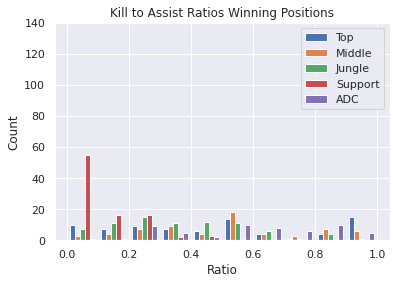

In [0]:
plt.hist([rawpositionskartopw['killassistratio'],rawpositionskarmidw['killassistratio'],rawpositionskarjgw['killassistratio'],rawpositionskarsuppw['killassistratio'],rawpositionskaradcw['killassistratio']],range=[0,1])
plt.title('Kill to Assist Ratios Winning Positions')
plt.xlabel('Ratio')
plt.ylabel('Count')
plt.ylim(0,140)
plt.legend(["Top","Middle","Jungle","Support","ADC"])

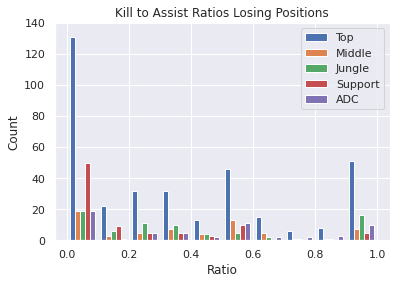

In [0]:
plt.hist([rawpositionskartopl['killassistratio'],rawpositionskarmidl['killassistratio'],rawpositionskarjgl['killassistratio'],rawpositionskarsuppl['killassistratio'],rawpositionskaradcl['killassistratio']],range=[0,1])
plt.title('Kill to Assist Ratios Losing Positions')
plt.xlabel('Ratio')
plt.ylabel('Count')
plt.ylim(0,140)
plt.legend(["Top","Middle","Jungle","Support","ADC"])

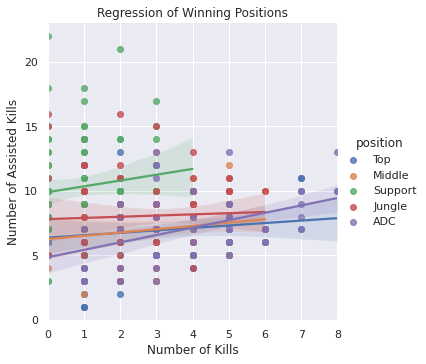

In [0]:
sns.set()

league = rawpositionskarwpositions
g = sns.lmplot(x="k",y="a", hue="position",
               height=5, data=league)

g.set_axis_labels("Number of Kills","Number of Assisted Kills")
plt.title('Regression of Winning Positions')
plt.show()

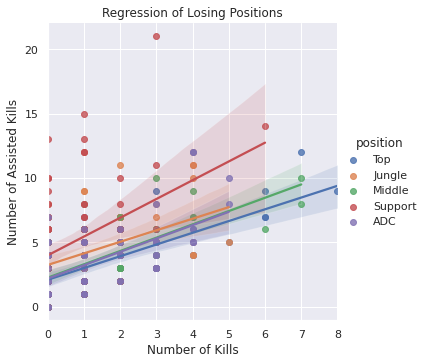

In [0]:
sns.set()

league = rawpositionskarlpositions
g = sns.lmplot(x="k",y="a", hue="position",
               height=5, data=league)

g.set_axis_labels("Number of Kills","Number of Assisted Kills")
plt.title('Regression of Losing Positions')
plt.show()

In [0]:
rawpositionskartopl['killassistratio'].describe()

count    356.000000
mean       0.347999
std        0.353513
min        0.000000
25%        0.000000
50%        0.285714
75%        0.571429
max        1.000000
Name: killassistratio, dtype: float64

In [0]:
rawpositionskartopw['killassistratio'].describe()

count    77.000000
mean      0.486526
std       0.327392
min       0.000000
25%       0.200000
50%       0.428571
75%       0.714286
max       1.000000
Name: killassistratio, dtype: float64

In [0]:
meanrawpositionskartopl = rawpositionskartopl['killassistratio'].mean()
meanrawpositionskartopw = rawpositionskartopw['killassistratio'].mean()
nrawpositionskartopl = len(rawpositionskartopl['killassistratio'])
nrawpositionskartopw = len(rawpositionskartopw['killassistratio'])
dofrawpositionskartopl = nrawpositionskartopl - 1
dofrawpositionskartopw = nrawpositionskartopw - 1
samplestdrawpositionskartopl = np.std(rawpositionskartopl['killassistratio'])
samplestdrawpositionskartopw = np.std(rawpositionskartopw['killassistratio'])
stderrorrawpositionskartopl = samplestdrawpositionskartopl/(nrawpositionskartopl**.5)
stderrorrawpositionskartopw = samplestdrawpositionskartopw/(nrawpositionskartopw**.5)

In [0]:
meanrawpositionskartopl

0.3479990125355294

In [0]:
meanrawpositionskartopw

0.48652555957750765

In [0]:
samplestdrawpositionskartopl

0.3530164718613338

In [0]:
samplestdrawpositionskartopw

0.325259592970364

In [0]:
ttest_1samp(rawpositionskartopl['killassistratio'],meanrawpositionskartopw)

Ttest_1sampResult(statistic=-7.393536399904301, pvalue=1.0371385771182142e-12)

Because the t-statistic of the average kill assist ratio for winning Top position has an extreme absolute t-statistic and p-value far, far below .05, we can also confidently reject the null hypothesis that the winning Top position KARs is not significantly different from losing Top position KARs; a lower KAR is indeed strongly associated with winning.
